import

In [1]:
import matplotlib.pyplot as plt
import torch
import os
import pandas as pd

from tqdm.notebook import tqdm as tqdm
from tqdm.auto import trange

import warnings
warnings.filterwarnings("ignore")

from myhelpers import config_plots, TrialStatistics
from HGNN.train import CNN, dataLoader
from HGNN.train.configParser import ConfigParser, getModelName, getDatasetName
from flashtorch_modefied import CNN_wrapper, Backprop, SaliencyMap

config_plots.global_settings()

experimetnsFileName = "experiments.csv"

parameters

In [2]:
experimentsPath="/home/elhamod/HGNN/experiments/"
dataPath="/data/BGNN_data"
experimentName="biology_paper_datasizes"
trial_hash="15c1c62af7df4ac1940b7484d26523287b7d72706d5186197b7a55ae"

cuda=6

cuda

In [3]:
# set cuda
if torch.cuda.is_available():
    torch.cuda.set_device(cuda)
    print("using cuda", cuda)

using cuda 6


importLoad experiment

In [4]:
config_parser = ConfigParser(experimentsPath, dataPath, experimentName)

experimentPathAndName = os.path.join(experimentsPath, experimentName)

datasetManager = dataLoader.datasetManager(experimentPathAndName, dataPath)

paramsIterator = config_parser.getExperiments()  
number_of_experiments = sum(1 for e in paramsIterator)  

load dataset and model

In [5]:
# Get experiment parameters
experimentsFileNameAndPath = os.path.join(experimentsPath, experimetnsFileName)
if os.path.exists(experimentsFileNameAndPath):
    experiments_df = pd.read_csv(experimentsFileNameAndPath)
else:
    raise Exception("Experiment not " + trial_hash + " found!")
experimentRecord = experiments_df[experiments_df["trialHash"] == trial_hash]
experiment_params = experimentRecord.to_dict('records')[0]
print(experiment_params)

# Create the model
datasetManager.updateParams(config_parser.fixPaths(experiment_params))
train_loader, validation_loader, test_loader = datasetManager.getLoaders()
fineList = test_loader.dataset.csv_processor.getFineList()
coarseList = test_loader.dataset.csv_processor.getCoarseList()
numberOffine = len(fineList)
numberOfcoarse = len(coarseList)
architecture = {
    "fine": numberOffine,
    "coarse" : numberOfcoarse
}
model = CNN.create_model(architecture, experiment_params)

{'experimentName': 'biology_paper_datasizes', 'modelName': 'models/15c1c62af7df4ac1940b7484d26523287b7d72706d5186197b7a55ae', 'datasetName': 'datasplits/1d513fa293ef4e4a37772337043e0e154d87ff0e27f98615149572df', 'experimentHash': '1953c28fb789157a4ea07ad2871627aa960df69e5b6a00a7ffa6560e', 'trialHash': '15c1c62af7df4ac1940b7484d26523287b7d72706d5186197b7a55ae', 'image_path': 'INHS_cropped', 'suffix': 'biology_paper_cleaned_50max', 'training_count': nan, 'validation_count': nan, 'batchSize': 64, 'n_epochs': nan, 'learning_rate': 5e-05, 'numOfTrials': 5, 'patience': nan, 'fc_width': nan, 'fc_layers': 1, 'modelType': 'HGNN_add', 'lambda': 0.6, 'unsupervisedOnTest': False, 'tl_model': 'ResNet18', 'augmented': True, 'weight_decay': nan, 'img_res': 448, 'tl_freeze': nan, 'cnn_layers': nan, 'cnn_channels': nan, 'pretrained': nan, 'two_nets': nan, 'link_layer': 'avgpool', 'dataset_norm': nan, 'aug_profile': nan}
Creating datasets...


scanning files: 100%|██████████| 1900/1900 [00:08<00:00, 236.64it/s]


Creating datasets... Done.
Creating loaders...
Creating loaders... Done.


Load model of a specific trial

In [6]:
# get the model and the parameters
modelName = experimentRecord.iloc[0]["modelName"]
trialName = os.path.join(experimentPathAndName, modelName)

df, epochs, time_elapsed = CNN.loadModel(model, trialName)

Model wrapper

In [7]:

wrapped_model = CNN_wrapper(model, experiment_params, test_loader.dataset)

Saliency map of one image

In [8]:
# params

wrapped_model.setOutputsOfInterest({
    "fine": True,
    "coarse" : False
})
img_full_path="/data/BGNN_data/INHS_cropped/images"
fileName= 'INHS_FISH_91030.jpg' # 'INHS_FISH_46448.jpg'# "INHS_FISH_85839.jpg" # "test_INHS_FISH_50076.jpg" # INHS_FISH_106556.jpg

layerName = "fine"
# "input": x,
# "hy_features": hy_features,
# "hb_features": hb_features,
# "gy_features": gy_features if outputs["fine"] else None,
# "gc_features": gc_features if outputs["coarse"] else None,
# "coarse": yc if outputs["coarse"] and modelType_has_coarse else None,
# "fine": y if outputs["fine"] else None

Number of activations:  torch.Size([1, 38])


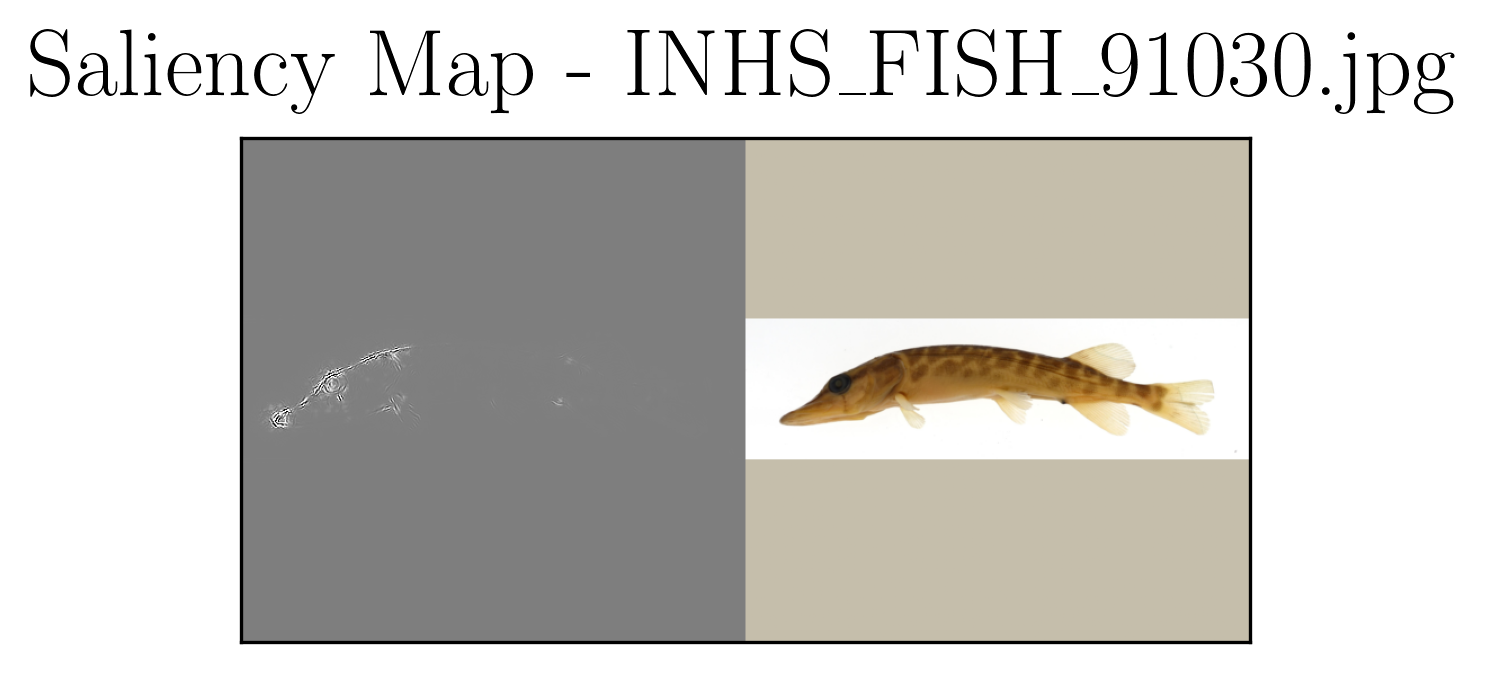

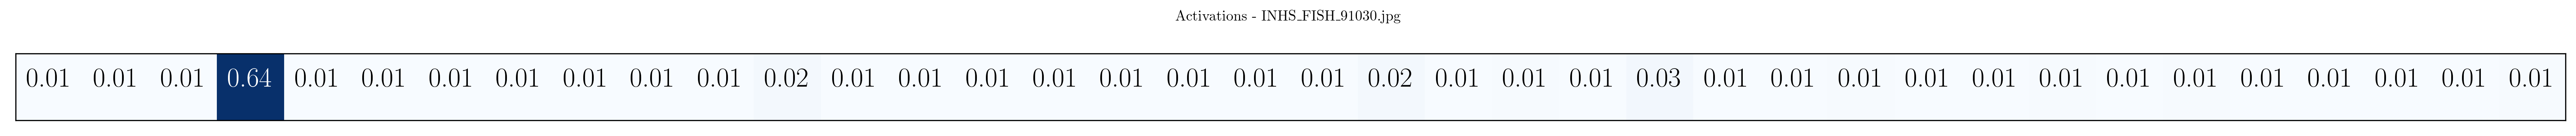

(tensor([[[ 7.1418e-05,  1.5801e-05, -1.1108e-05,  ...,  7.4820e-06,
            2.6444e-05,  5.6676e-06],
          [ 4.7478e-04,  5.1102e-04,  4.9305e-04,  ..., -5.4884e-06,
           -5.9176e-06,  1.6484e-05],
          [ 5.3487e-04,  8.6772e-04,  7.5130e-04,  ...,  1.0689e-05,
           -2.8177e-07, -1.4358e-06],
          ...,
          [ 4.4553e-06,  4.1071e-06,  4.2204e-06,  ...,  9.8561e-07,
            2.9158e-06,  2.6330e-06],
          [ 6.0573e-06,  4.1448e-06,  2.9230e-06,  ...,  3.4368e-06,
            6.4765e-06,  6.7445e-06],
          [ 6.5657e-06,  4.3724e-06,  2.4404e-06,  ...,  4.1038e-06,
            7.5484e-06,  7.5615e-06]]]),
 array([0.00825228, 0.00849452, 0.00825228, 0.6360957 , 0.00825228,
        0.00825228, 0.00838123, 0.00862937, 0.00825228, 0.00825228,
        0.00825228, 0.01857924, 0.00825228, 0.00825228, 0.00986873,
        0.00825228, 0.00825228, 0.00825228, 0.00825228, 0.00953269,
        0.0201755 , 0.00825228, 0.01081478, 0.00825228, 0.02504184,


In [9]:
import os
from torchvision import transforms as torchvision_transforms
from skimage import io

saliencyMap = SaliencyMap(test_loader.dataset, wrapped_model, experimentPathAndName, trial_hash, experiment_params)
saliencyMap.GetSaliencyMap(img_full_path, fileName, layerName, use_gpu=True)

203 77
Number of activations:  torch.Size([1, 38])


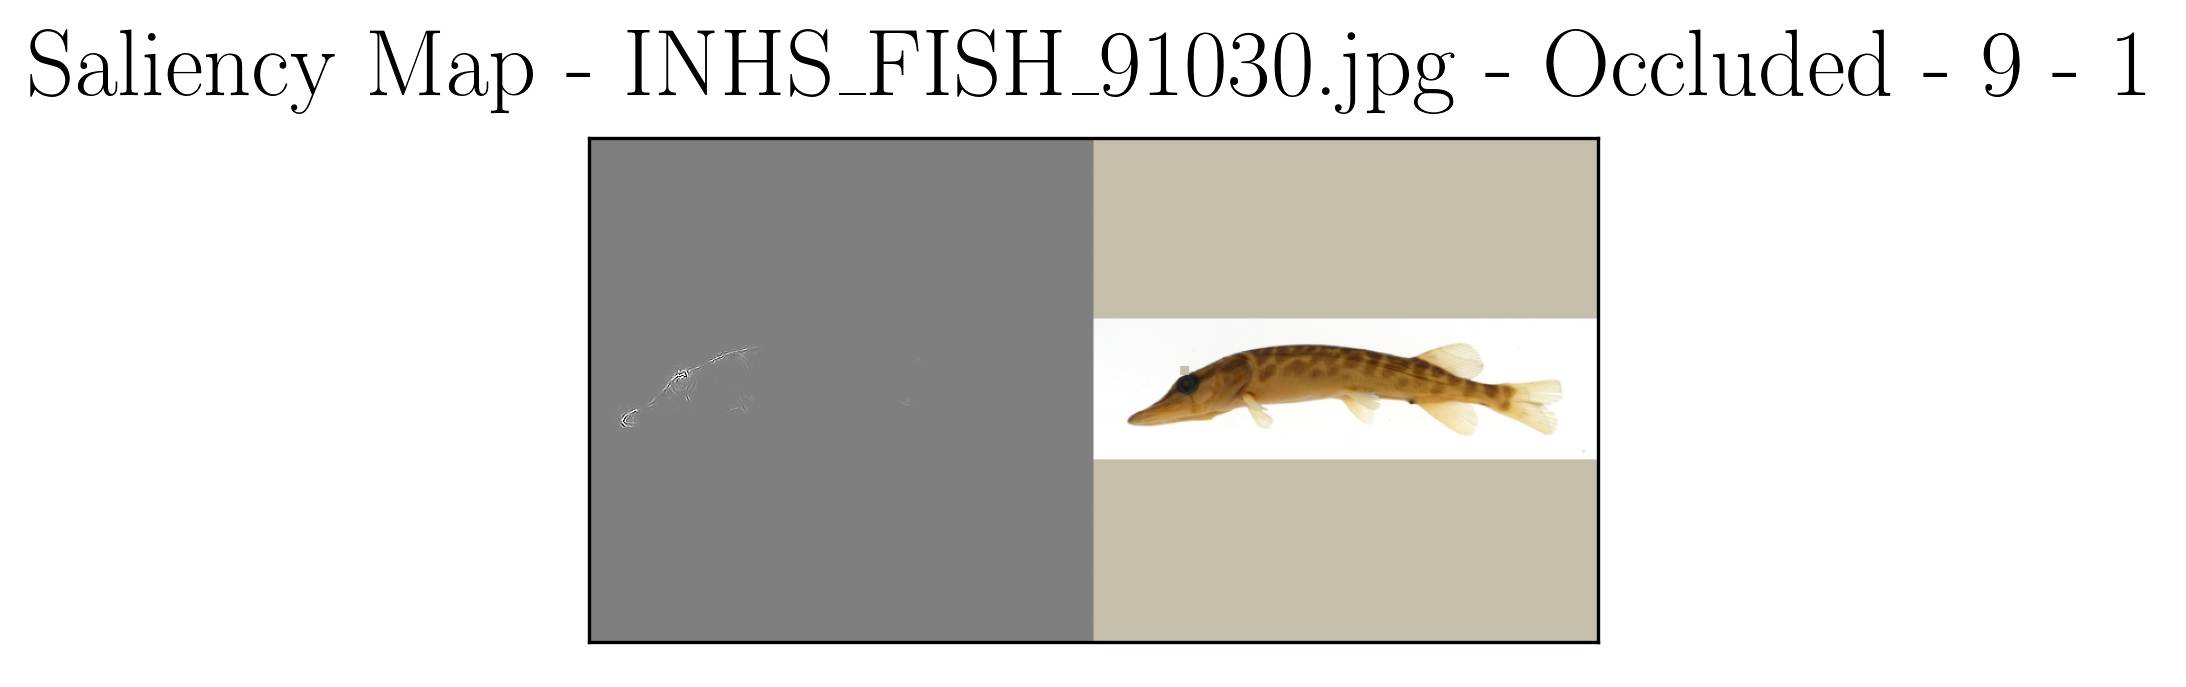

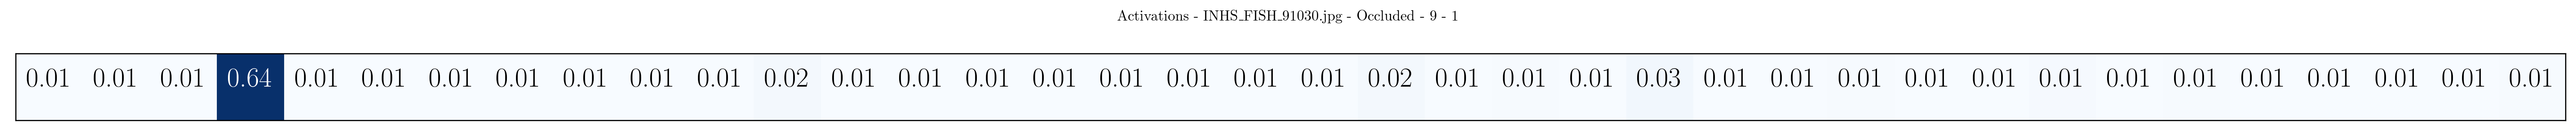

248 23
Number of activations:  torch.Size([1, 38])


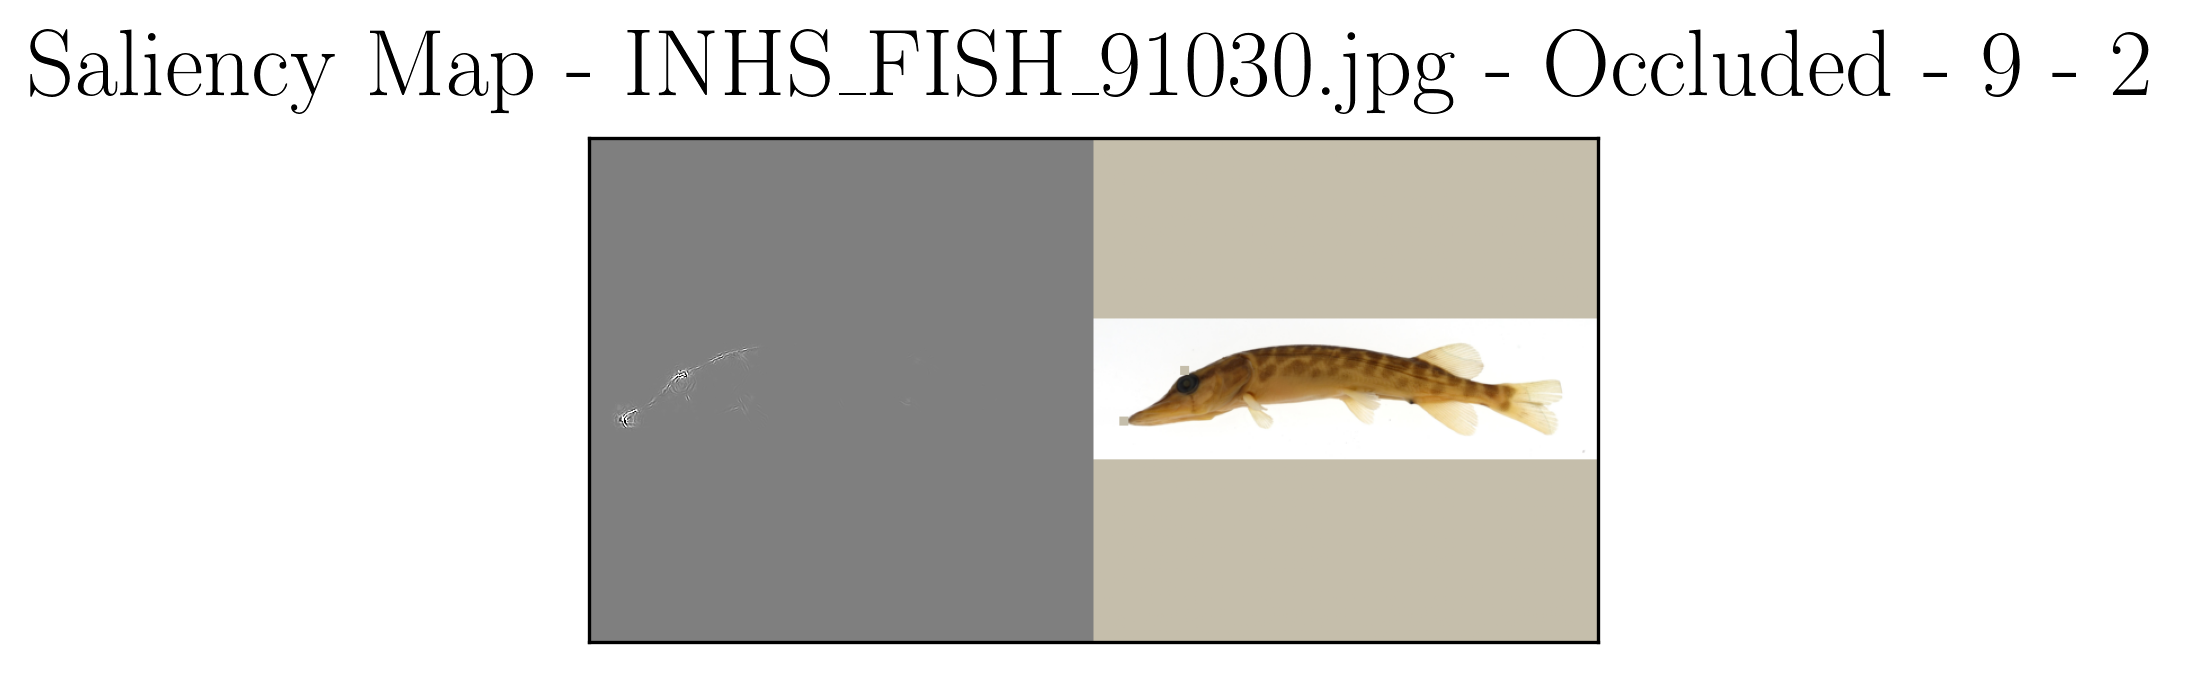

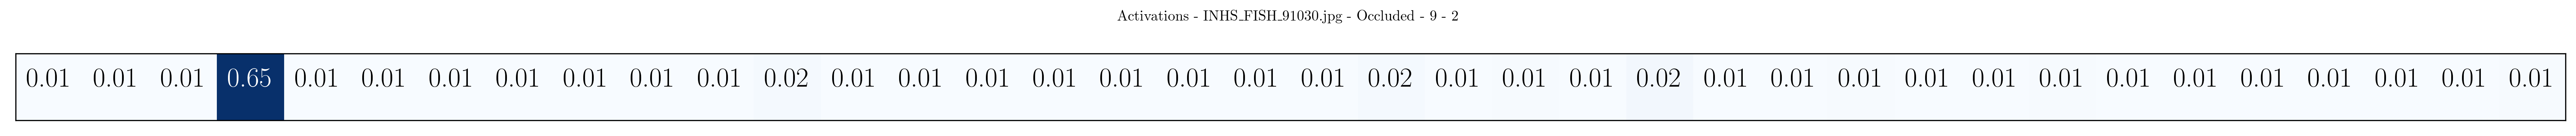

238 29
Number of activations:  torch.Size([1, 38])


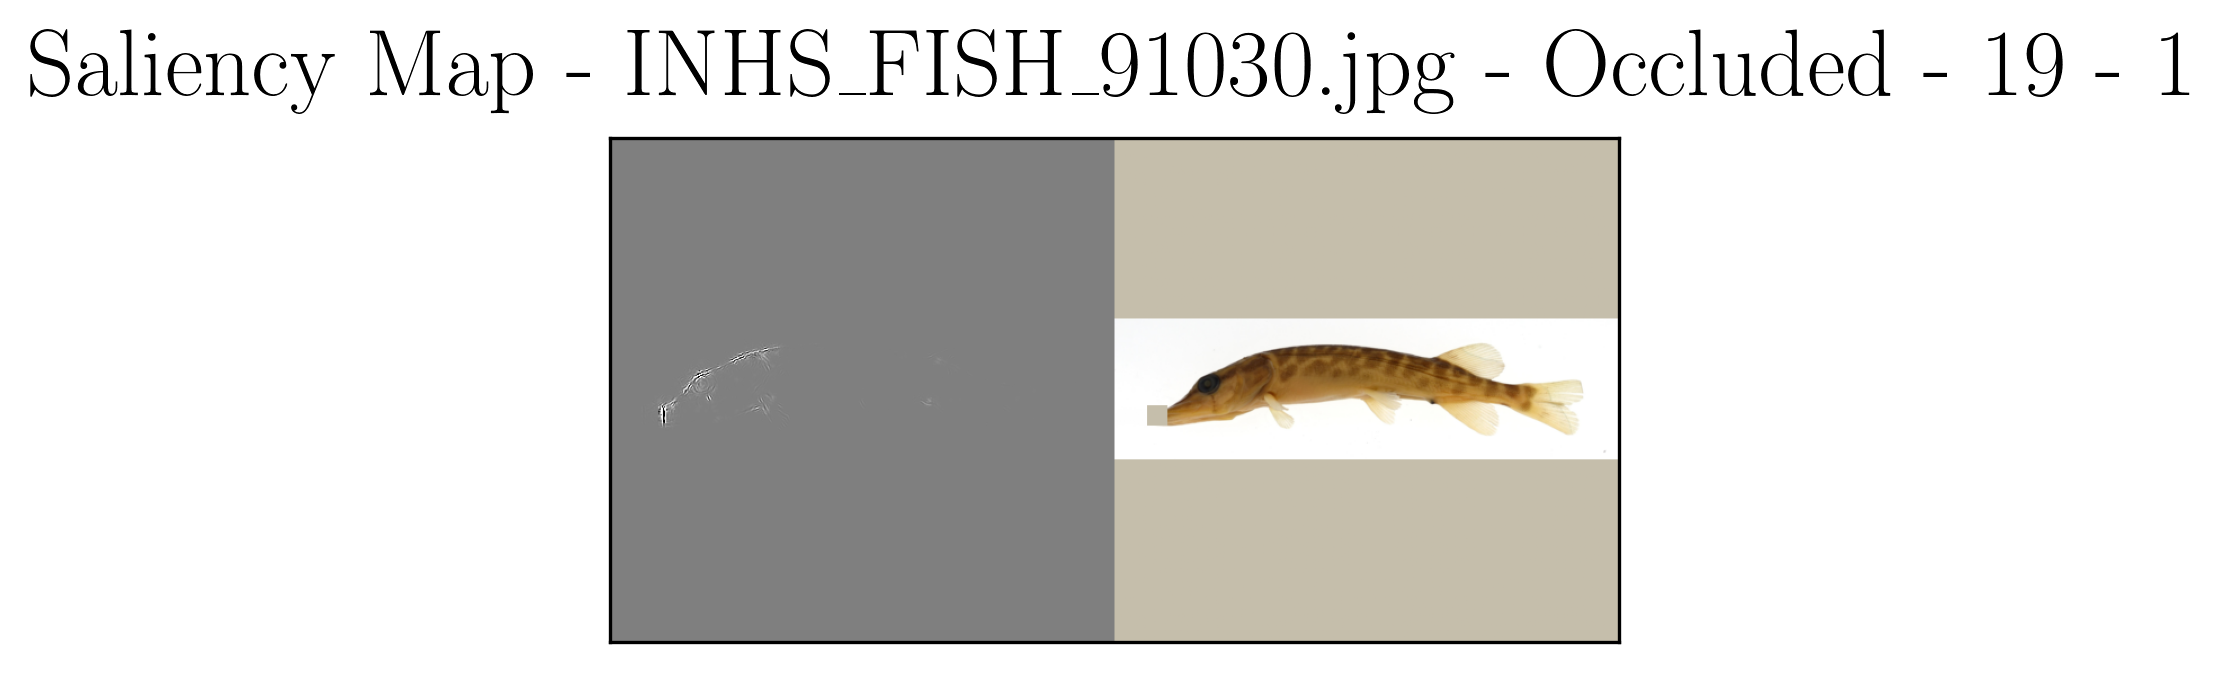

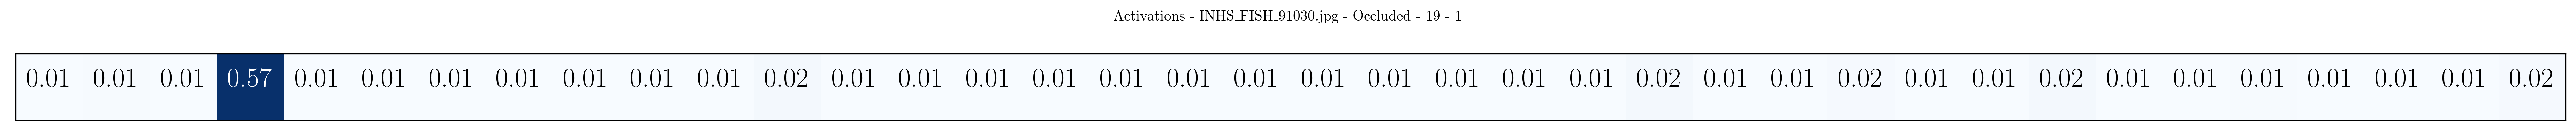

200 67
Number of activations:  torch.Size([1, 38])


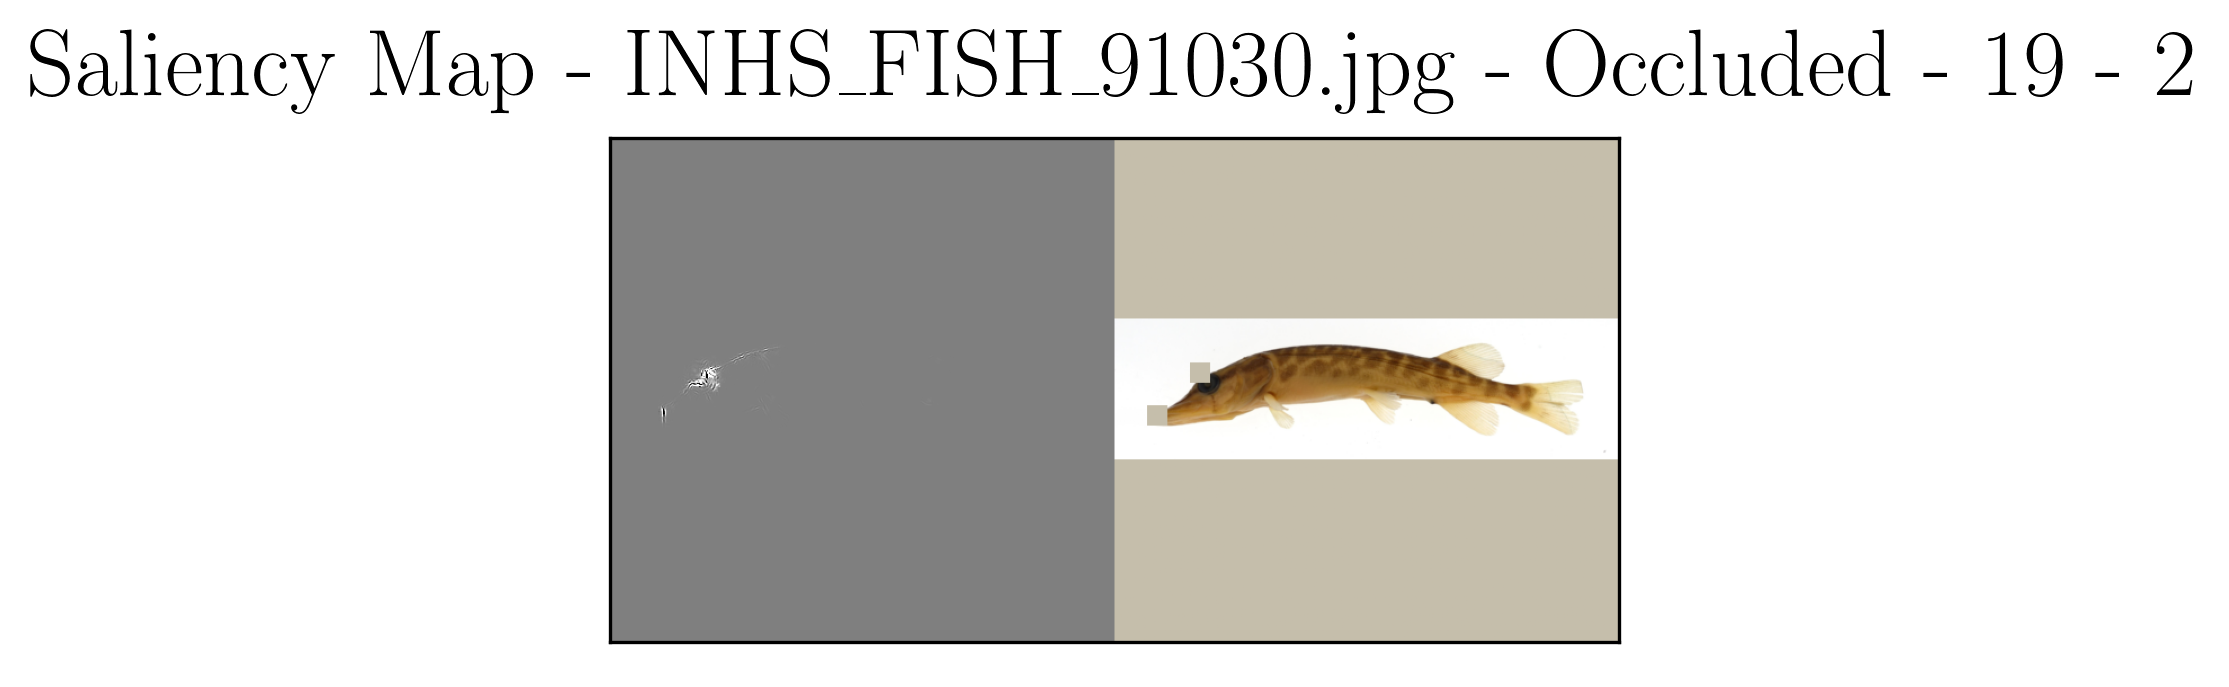

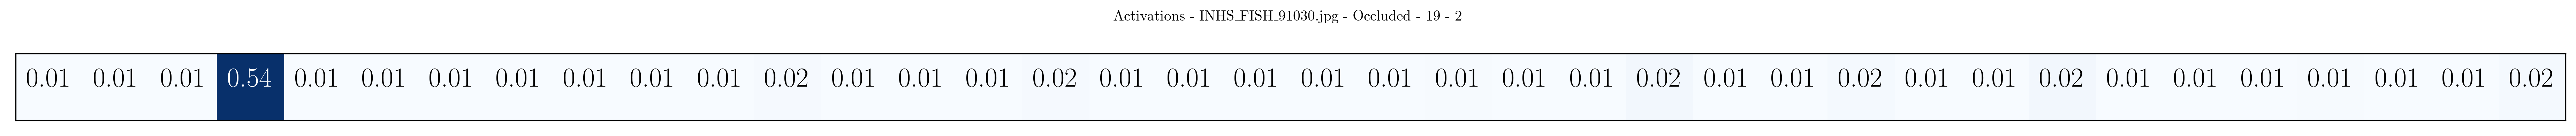

189 73
Number of activations:  torch.Size([1, 38])


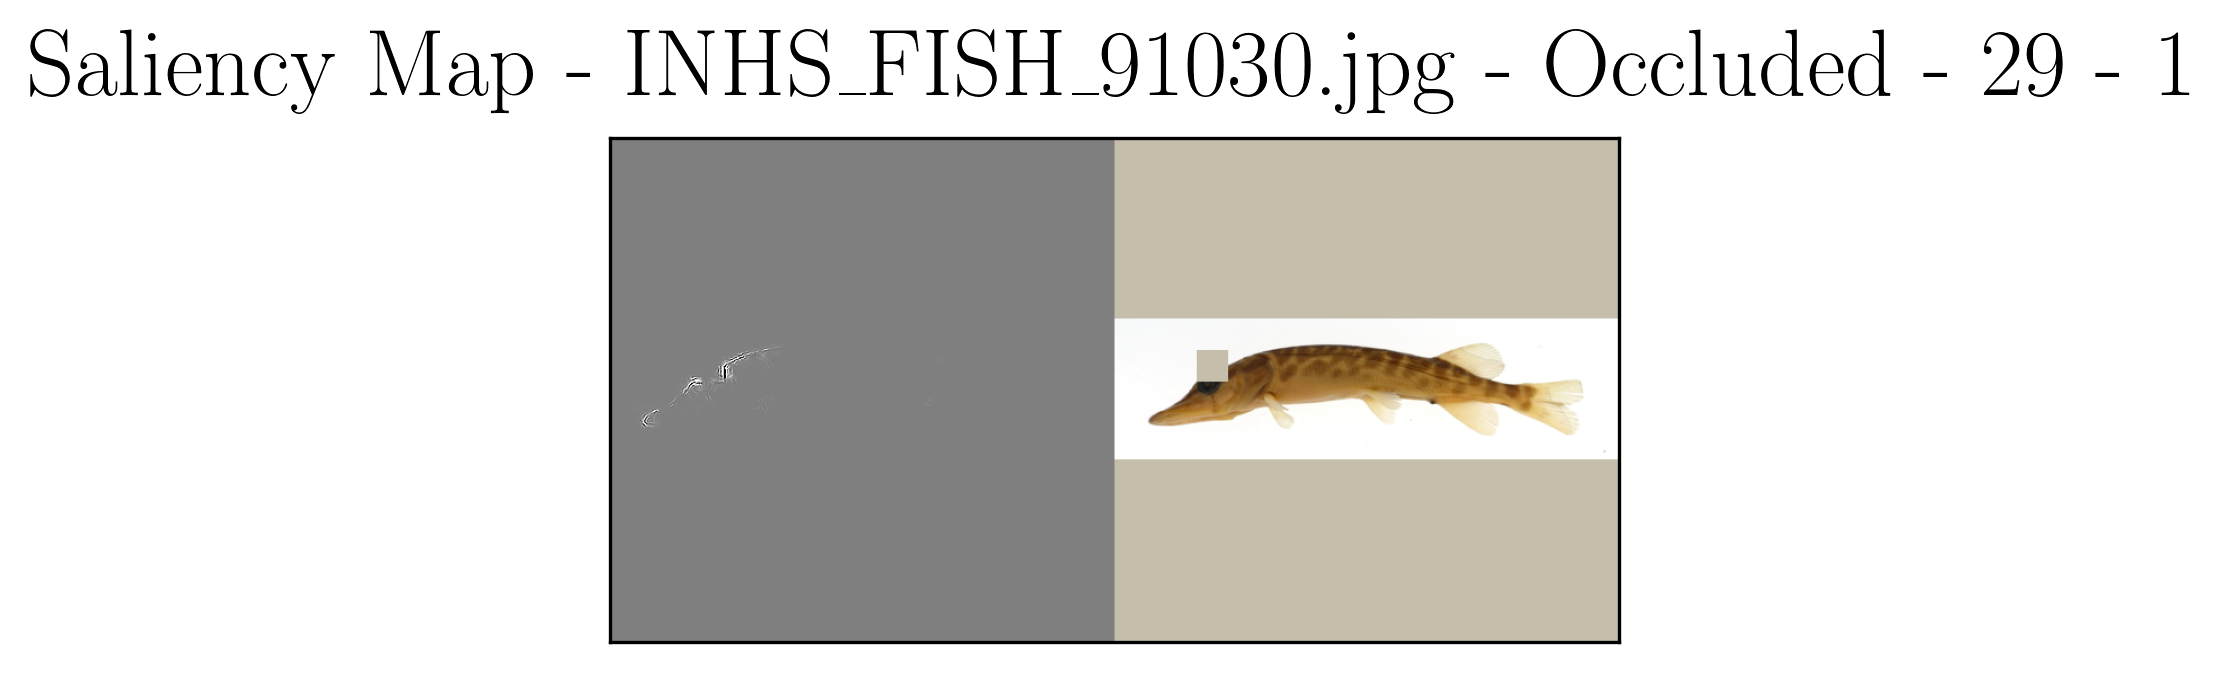

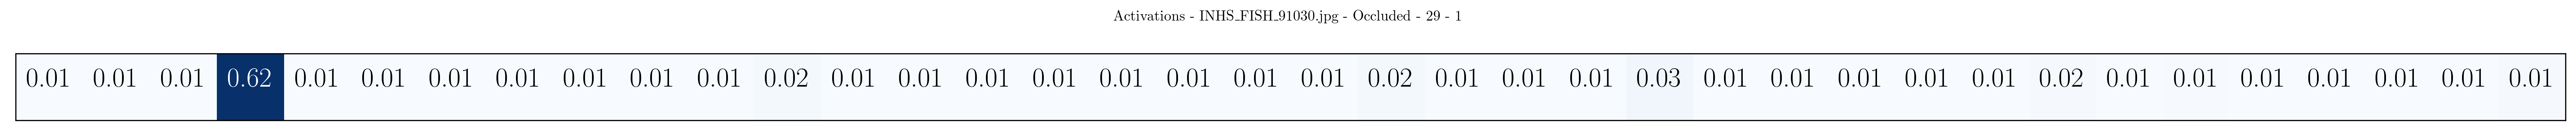

247 15
Number of activations:  torch.Size([1, 38])


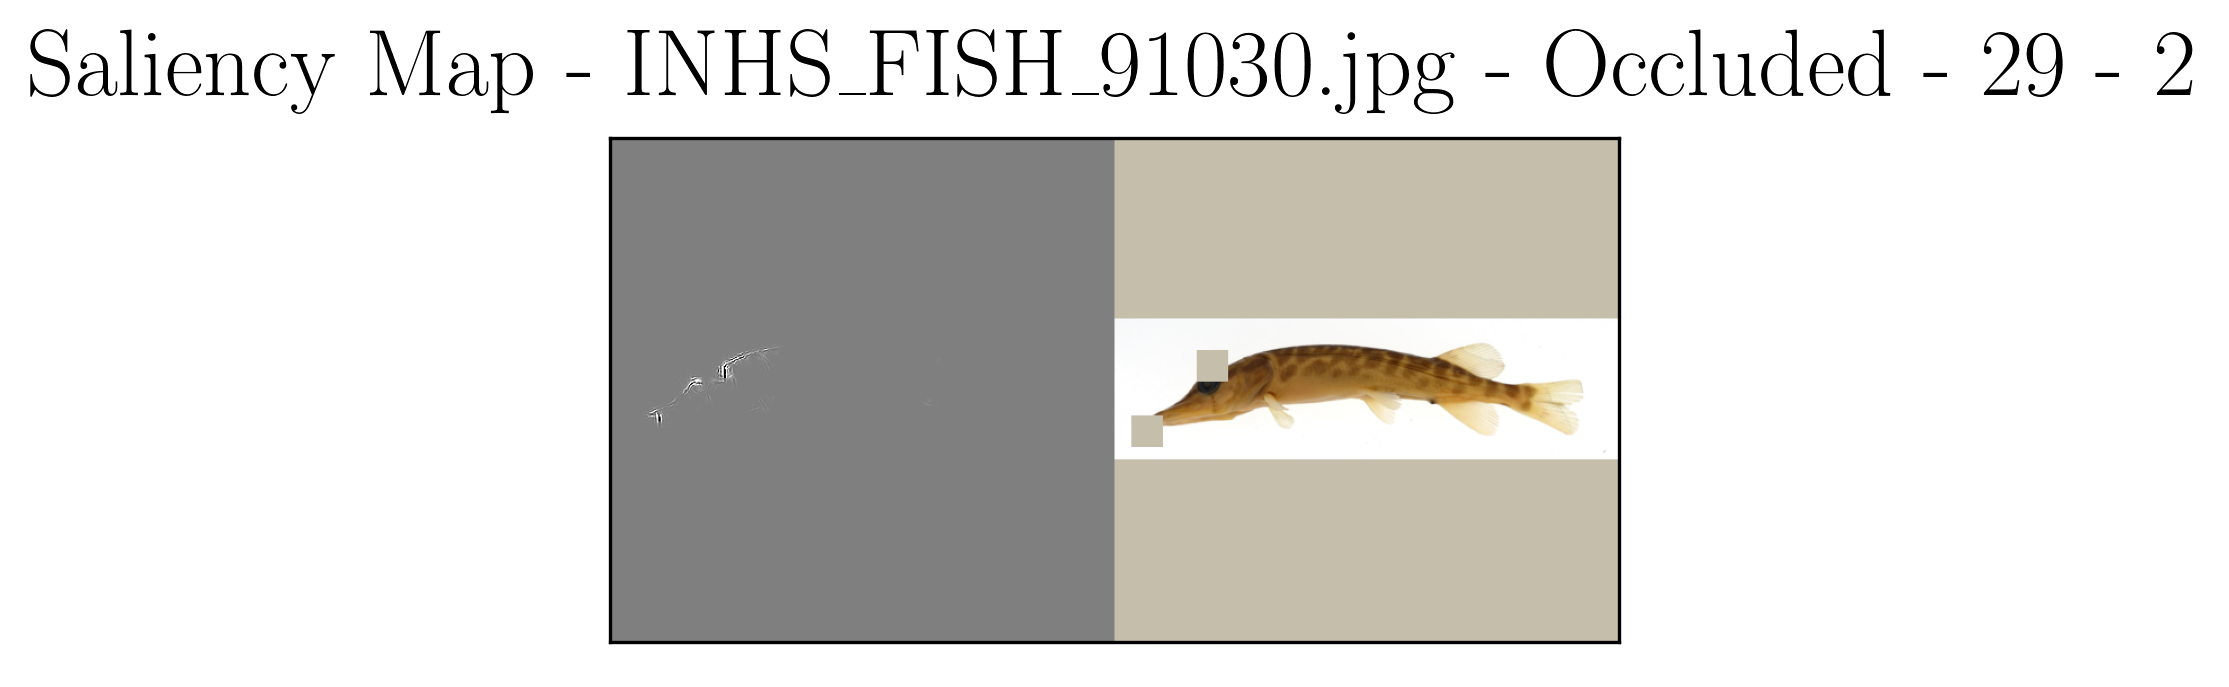

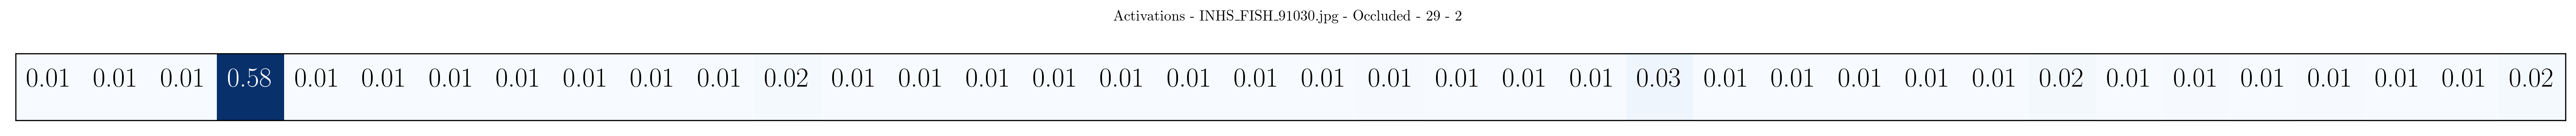

215 20
Number of activations:  torch.Size([1, 38])


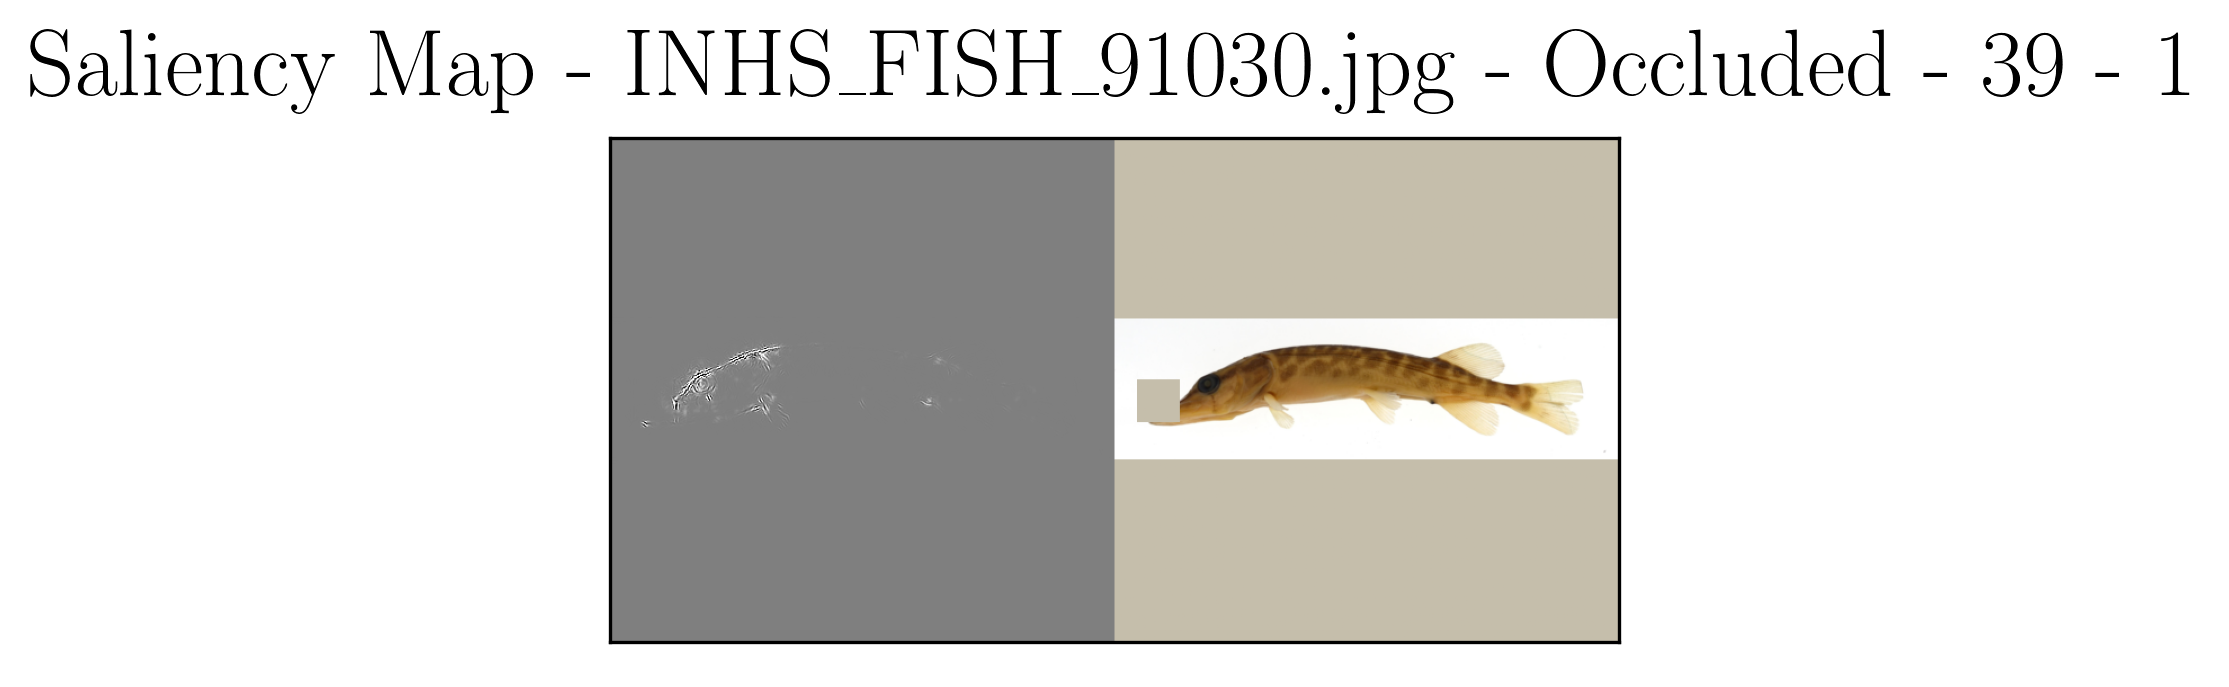

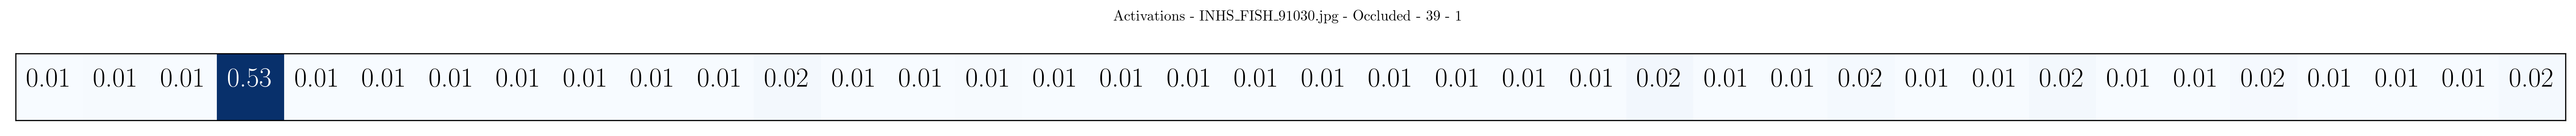

176 59
Number of activations:  torch.Size([1, 38])


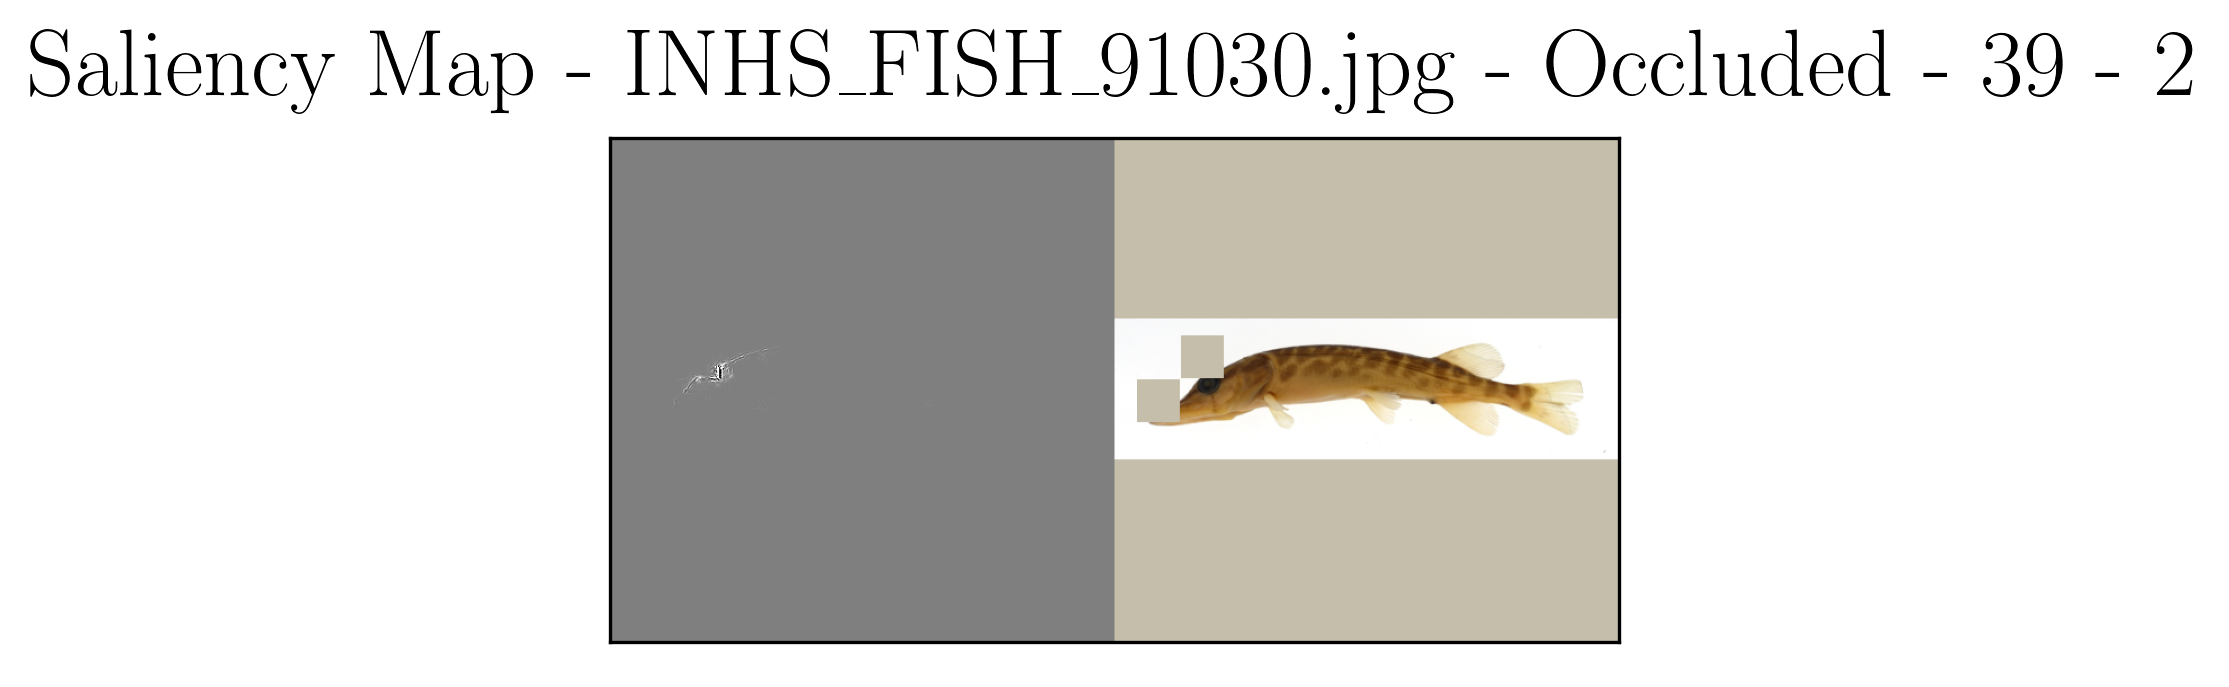

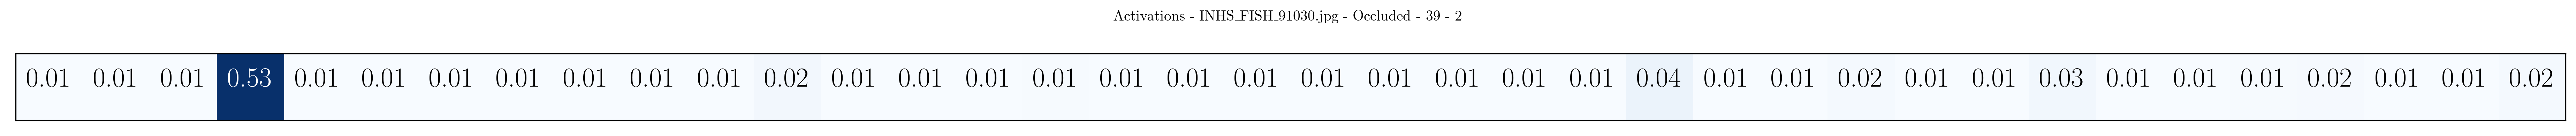

221 25
Number of activations:  torch.Size([1, 38])


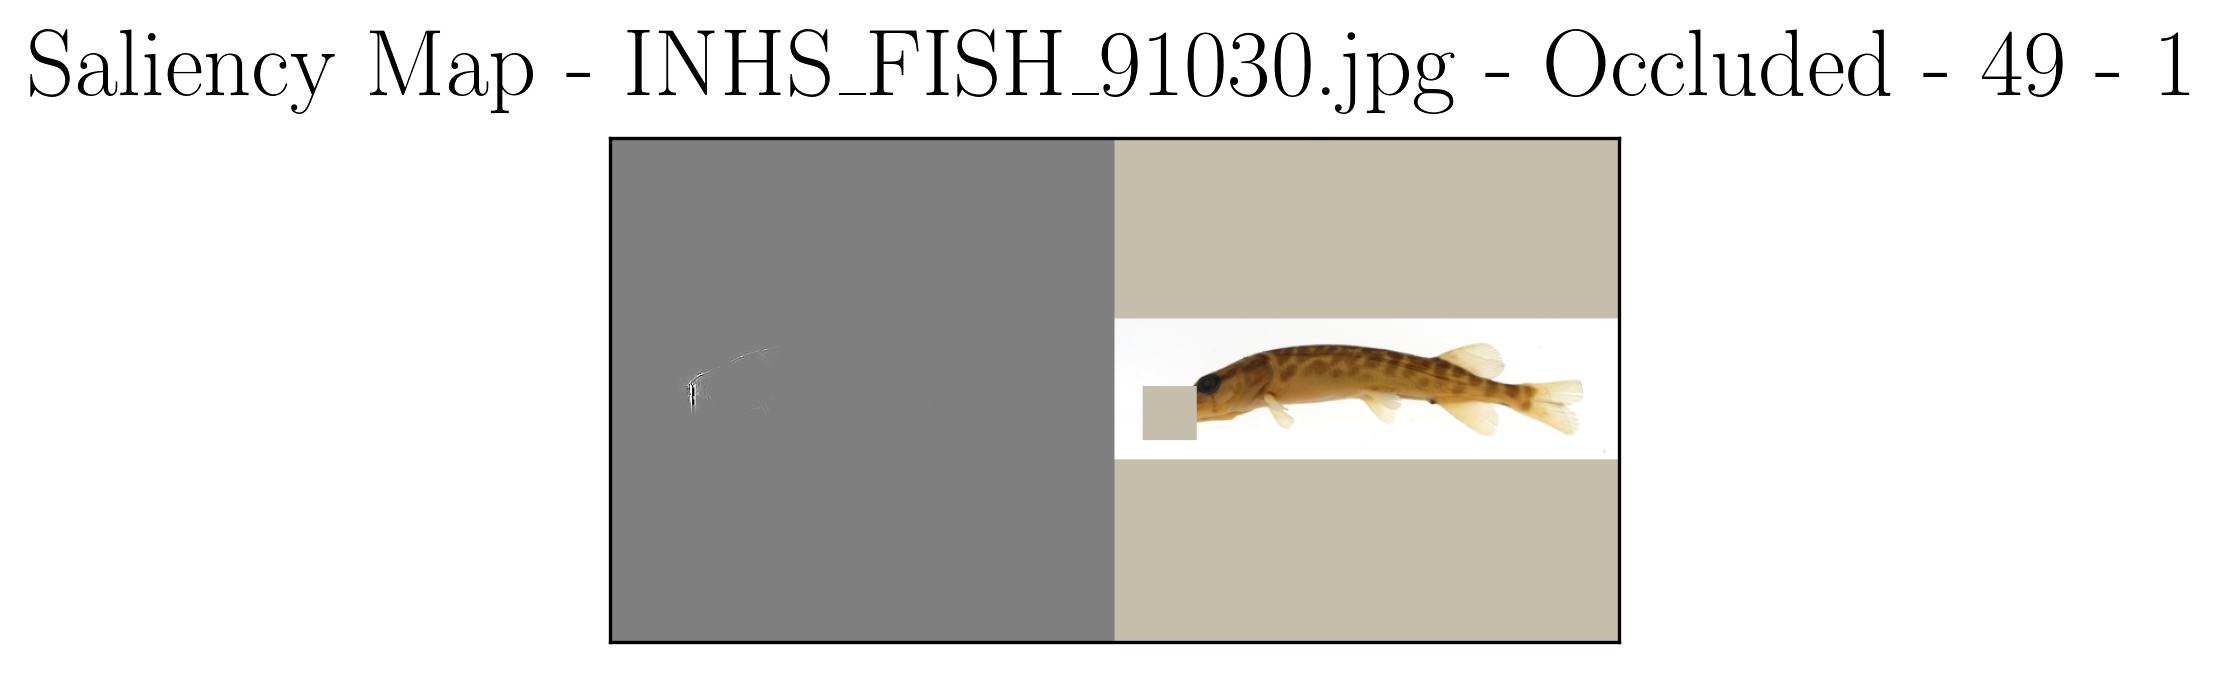

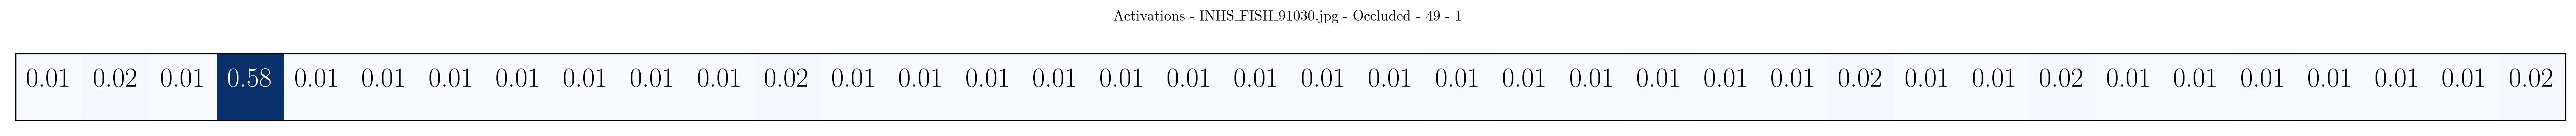

172 74
Number of activations:  torch.Size([1, 38])


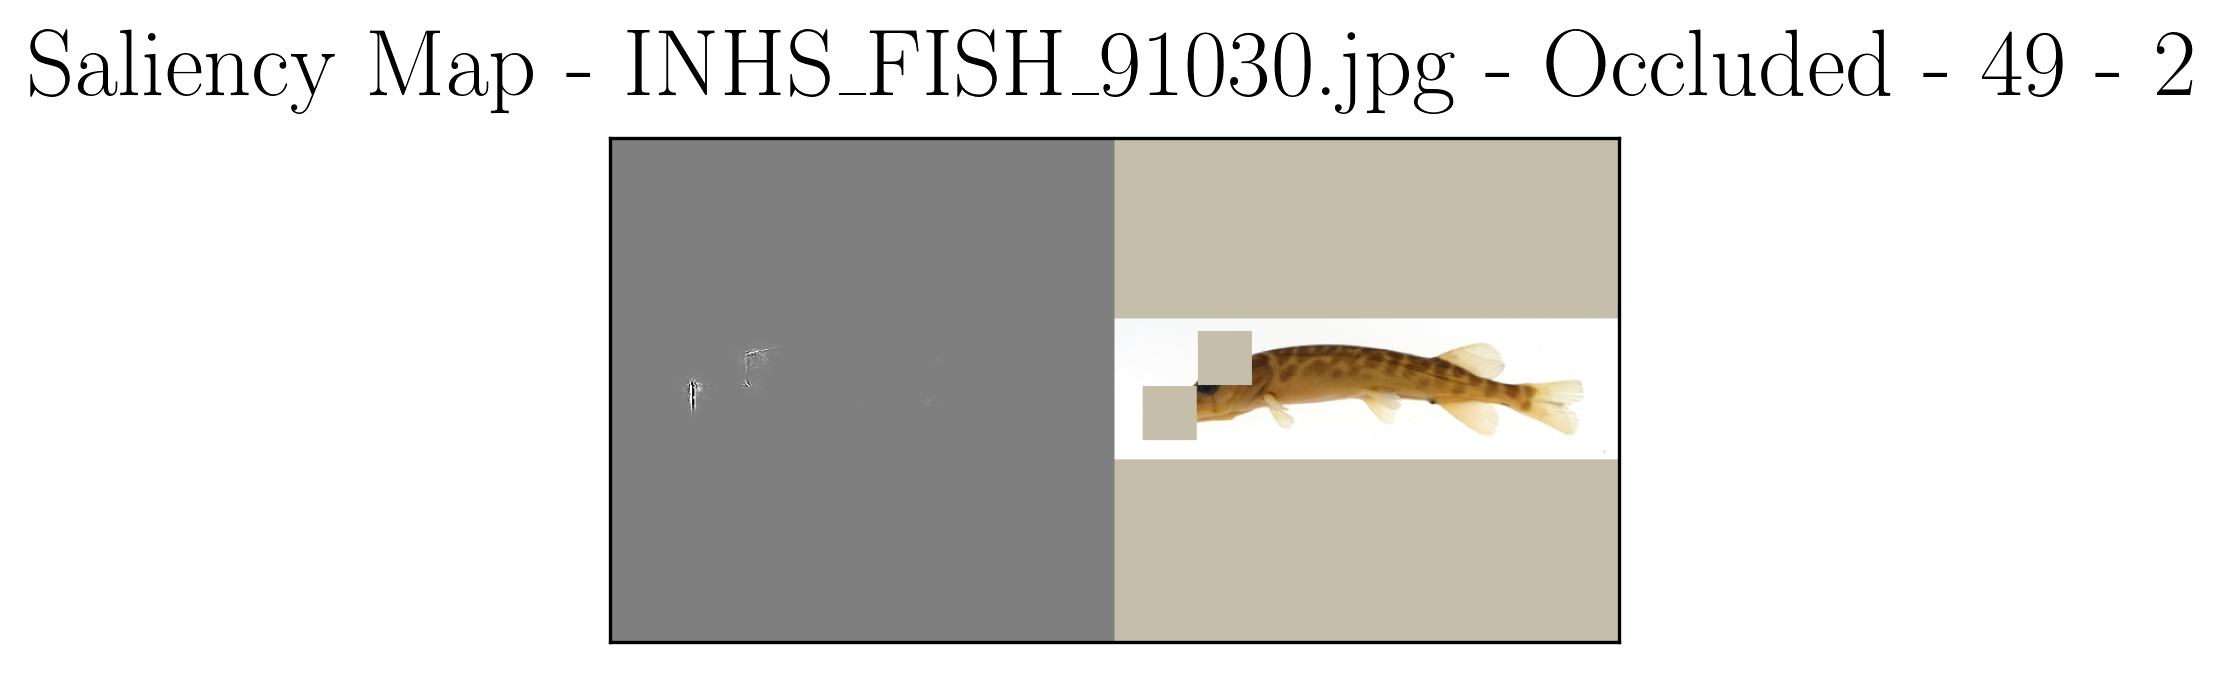

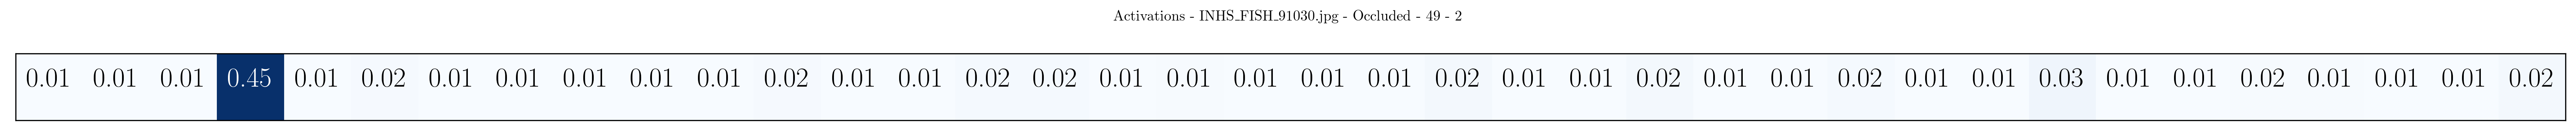

In [10]:
for i in [9, 19, 29 ,39 ,49]:
    saliencyMap.GetSaliencyMap(img_full_path, fileName,layerName,box_width =i, maxCovered=True, topk=2, use_gpu=True)

In [11]:
species = 0

train_loader, validation_loader, test_loader = datasetManager.getLoaders()
loader = train_loader

lst = []
for batch in loader:
    lst = lst + [batch['fileName'][i] for i in batch['fine'] if batch['fine'][i] == species]
print(lst)

Creating loaders...
Creating loaders... Done.
['INHS_FISH_100088.JPG', 'INHS_FISH_100088.JPG', 'INHS_FISH_935.JPG', 'INHS_FISH_935.JPG', 'INHS_FISH_935.JPG', 'INHS_FISH_935.JPG', 'INHS_FISH_935.JPG', 'INHS_FISH_935.JPG', 'INHS_FISH_38910.JPG', 'INHS_FISH_99251.JPG', 'INHS_FISH_49982.JPG', 'INHS_FISH_49982.JPG', 'INHS_FISH_49982.JPG', 'INHS_FISH_5837.JPG', 'INHS_FISH_5837.JPG', 'INHS_FISH_42475.JPG', 'INHS_FISH_26459.JPG', 'INHS_FISH_24054.JPG', 'INHS_FISH_19736.JPG', 'INHS_FISH_90360.JPG', 'INHS_FISH_90360.JPG', 'INHS_FISH_19736.JPG', 'INHS_FISH_24054.JPG', 'INHS_FISH_90360.JPG', 'INHS_FISH_24054.JPG', 'INHS_FISH_91608.JPG', 'INHS_FISH_24800.JPG', 'INHS_FISH_24800.JPG', 'INHS_FISH_5773.JPG', 'INHS_FISH_5773.JPG', 'INHS_FISH_5773.JPG', 'INHS_FISH_73683.JPG', 'INHS_FISH_54478.JPG', 'INHS_FISH_73683.JPG', 'INHS_FISH_54478.JPG', 'INHS_FISH_99256.JPG', 'INHS_FISH_48605.JPG', 'INHS_FISH_48605.JPG', 'INHS_FISH_106314.JPG', 'INHS_FISH_106314.JPG', 'INHS_FISH_106314.JPG']


Iterate and give score

In [20]:
from PIL import Image

import gc


def getAverageCorrectProb(loader, layerName, box_width, topk):
    prob = []
    with tqdm(total=len(loader.dataset)) as bar:
        for img in loader:
            fileNames = img['fileName']
            lbls=img[layerName]
            for i, fileName in enumerate(fileNames):
                if topk > 0:
                    _, A = saliencyMap.GetSaliencyMap(img_full_path, fileName,layerName,box_width =box_width, maxCovered=True, topk=topk, plot=False, use_gpu=True)
                else:
                    isSpecies = (layerName == "fine")
                    activationOutputs = {
                        "fine": isSpecies,
                        "coarse" : not isSpecies
                    }
                    img = saliencyMap.getTransformedImage(Image.open(os.path.join(img_full_path, fileName)), False, True)
                    wrapped_model.setOutputsOfInterest(activationOutputs)

                    if torch.cuda.is_available():
                        img = img.cuda()
                    A = wrapped_model(img)
                    
                if (layerName == "coarse" or layerName == "fine"):
                    A = torch.nn.Softmax(dim=1)(A)
                
                if torch.cuda.is_available():
                    A = A.detach().cpu()
                prob_ = A[0][lbls[i]]
                prob.append(prob_)

                bar.update()

    return (sum(prob) / len(prob)).item()


def add_occlusion_result(df, loader, func, label, patchsize, iterations):
    result = func(loader, label, patchsize, iterations)
    return df.append(pd.DataFrame({
        "label": [label],
        "patch size": [patchsize],
        "iterations": [iterations],
        "average correct probability": [result]
    }))

In [21]:
# Create the test loader with small batch
test_loader = torch.utils.data.DataLoader(test_loader.dataset, batch_size=1)

df = pd.DataFrame()

In [22]:
df = add_occlusion_result(df, test_loader, getAverageCorrectProb, "fine", 19, 0)

In [24]:
df = add_occlusion_result(df, test_loader, getAverageCorrectProb, "fine", 19, 1)

In [25]:
df = df.append(pd.DataFrame({
        "label": ["test"],
        "patch size": [19],
        "iterations": [1],
        "average correct probability": [1.23]
    }))

In [26]:
df = add_occlusion_result(df, test_loader, getAverageCorrectProb, "fine", 19, 2)

In [27]:
df = add_occlusion_result(df, test_loader, getAverageCorrectProb, "coarse", 19, 0)

In [28]:
df = add_occlusion_result(df, test_loader, getAverageCorrectProb, "coarse", 19, 1)

In [29]:
df = add_occlusion_result(df, test_loader, getAverageCorrectProb, "coarse", 19, 2)

In [43]:
df = df.reset_inde()

In [44]:
df.to_csv(os.path.join(experimentPathAndName, "models", trial_hash, 'occlusion.csv'))

In [45]:
df

,label,patch size,iterations,average correct probability
0,fine,19,0,0.451480
1,fine,19,1,0.396003
3,fine,19,2,0.369881
4,coarse,19,0,0.489166
5,coarse,19,1,0.464328
6,coarse,19,2,0.446964
